In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
import tensorflow as keras

# 신경망과 첫 만남

### 패션 MNIST 이미지를 10개 범주로 분류

## 데이터 준비

In [3]:
# 케라스에서 Fashion MNIST 데이터셋 적재
from keras.datasets import fashion_mnist

(train_input, train_target), (test_input, test_target) = fashion_mnist.load_data()

In [4]:
train_input.shape #3d 텐서 - 60000개가 28 X 28

(60000, 28, 28)

In [5]:
train_target.shape

(60000,)

In [6]:
test_input.shape

(10000, 28, 28)

In [7]:
test_target.shape

(10000,)

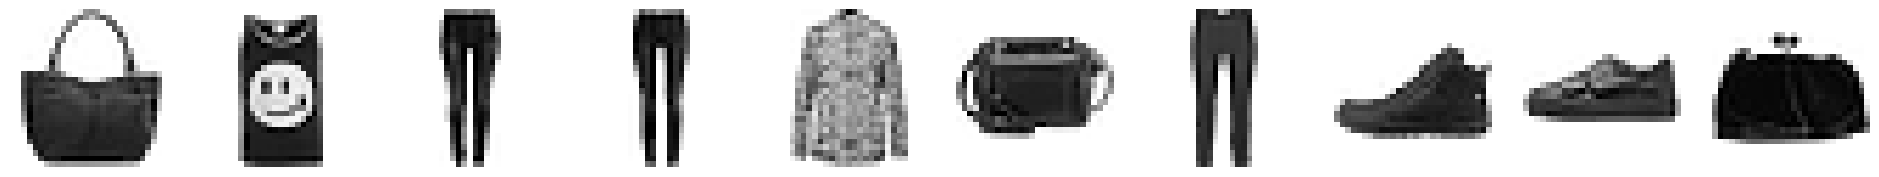

In [8]:
fig, axs = plt.subplots(figsize=(24,10), nrows=1, ncols=10)
for i in range(10):
    img = train_input[i+100]
    axs[i].imshow(img, cmap=plt.cm.binary) #cmap = 'gray_r'로 줘도 됨
    axs[i].axis('off')

In [9]:
np.unique(train_target, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))

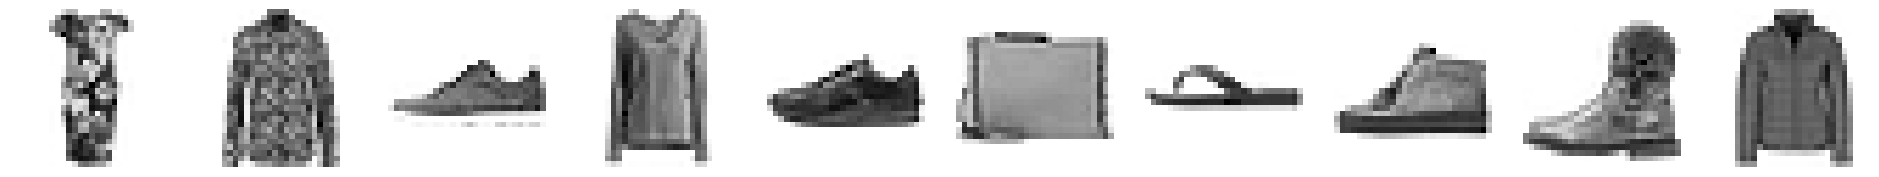

In [10]:
fig, axs = plt.subplots(figsize=(24,10), nrows=1, ncols=10)
for i in range(10):
    img = test_input[i+100]
    axs[i].imshow(img, cmap=plt.cm.binary) #cmap = 'gray_r'로 줘도 됨
    axs[i].axis('off')

In [11]:
np.unique(test_target, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]))

**네트워크에 맞는 이미지 데이터로 준비**

훈련 데이터와 평가데이터

In [12]:
train_input.shape

(60000, 28, 28)

In [13]:
np.unique(train_input[0])

array([  0,   1,   2,   3,   4,   6,   7,  10,  12,  13,  15,  18,  23,
        29,  35,  36,  40,  41,  44,  48,  52,  54,  55,  56,  57,  58,
        61,  62,  64,  65,  66,  67,  69,  72,  73,  74,  75,  77,  80,
        82,  88,  92,  98,  99, 102, 106, 107, 109, 115, 117, 119, 121,
       122, 123, 127, 130, 134, 136, 141, 144, 145, 146, 150, 154, 155,
       156, 159, 161, 163, 164, 166, 167, 168, 169, 170, 171, 172, 173,
       175, 176, 177, 178, 179, 180, 181, 182, 183, 185, 186, 187, 188,
       189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 202,
       203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215,
       216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228,
       229, 230, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242,
       243, 244, 245, 246, 248, 249, 250, 255], dtype=uint8)

- [0,255] 사이의 값인 unit8 타입의 (60000, 28, 28)크기를 가진 배열을 0과 1사이의 값을 가지는 float32 타입의 (60000, 28 * 28) 크기 배열로 변환

In [14]:
train_input = train_input.reshape((60000, 28*28))
train_input = train_input.astype('float32')/255 #정수형을 정규화 시켜줄거라서 float으로

test_input = test_input.reshape((10000, 28*28))
test_input = test_input.astype('float32')/255 #255로 나눠서 정규화 / 255.0으로 나누면 astype float 안해도됨

In [15]:
train_input[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [16]:
train_input.shape

(60000, 784)

- 타깃 레이블 범주형으로 인코딩

In [17]:
train_target

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [18]:
from keras.utils import to_categorical

train_target = to_categorical(train_target)
test_target = to_categorical(test_target)

In [19]:
train_target.shape #60000에 10이 추가됨 (2차원이 됨)

(60000, 10)

## 모델 설계 및 실행

### 1) 신경망 모델 정의

In [20]:
from keras import models, layers

In [21]:
nn = models.Sequential([layers.Dense(100, activation='relu', 
                    input_shape=(28*28, )), #밀집 층 - 첫번째 층에는 input shapr 넣어줘야 함
                   layers.Dense(10, activation='softmax')]) #출력 / softmax 활성화 함수 
# 10가지

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**신경망 구조**
- 입력층, 은닉층, 출력층

In [22]:
nn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

- 모델 이름
- 층에 대한 정보
    - Output Shape : (샘플수, 뉴런수) #샘플수를 안정해놔서 None으로 나옴
        - 샘플수가 None인 경우는 샘플 개수가 정해지지 않아서 
        - fit() 메소드에 훈련 데이터를 주입하면 이 데이터를 사용해서 학습
    - Param : 모델의 파라미터 개수 (이전 층의 뉴런의 수 * 현재 층의 뉴런 수 + 현재 층의 뉴런 수)

#### 모델 시각화: plot_model()

- pydot와 graphviz 설치

In [23]:
# pip install pydot graphviz

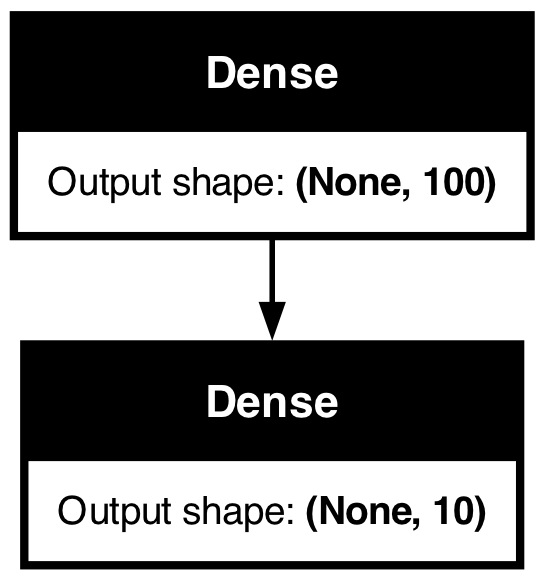

In [24]:
from keras.utils import plot_model
plot_model(nn, show_shapes=True)
# plot_model(nn, to_file = 'img/model_01.png', show_shapes=True)

### 2) 모델 컴파일

지정한 모델이 효과적으로 구현될 수 있게 여러 가지 환경을 설정해 주면서 컴파일하는 부분

In [25]:
nn.compile(optimizer='adam', loss='categorical_crossentropy',
           metrics=['accuracy'])

- optimizer : 최적화 알고리즘
    - SGD, 네스트로프 모멘텀, RMSprop, Adagrad, Adam(가장 성능이 좋음)
- loss : 손실함수
    - 이진분류 : binary_crossentropy
    - 다중분류 : categorical_crossentropy
    - 정수레이블을 갖는 다중분류 : sparse_categorical_crossentropy
    - 회귀모델 : mean_square_error
- metrics : 성능지표, accuracy
- 참고(손실 함수): https://www.tensorflow.org/api_docs/python/tf/keras/losses
- 참고(엔트로피): https://curt-park.github.io/2018-09-19/loss-cross-entropy/

### 3) 모델 실행(훈련)

In [26]:
nn.fit(train_input, train_target, batch_size=128, epochs=5)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7377 - loss: 0.7803
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8545 - loss: 0.4166
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8696 - loss: 0.3735
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8762 - loss: 0.3489
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8819 - loss: 0.3322


- epochs : 전체 훈련 데이터 셋을 몇 번 학습할 것인지 반복 횟수
- batch_size : 한번 학습할 때 주입되는 데이터 크기

In [27]:
60000 / 128 #데이터를 469번 쪼개서 학습 128번까지, 256번까지,...
#batch_size = 128 6만개 데이터를 128개씩 쪼개서 들어가겠다
#epochs = 5 그걸 5번 반복해서 학습시키겠다
#accuracy는 점점 커지고 , loss 손실값은 점점 작아짐 

468.75

### 4) 모델 예측(평가)

네트워크의 손실과 정확도 확인

In [28]:
10000/128

78.125

In [29]:
#test_target(실제 값)과 얼마나 일치하는지 확인 evaluate
test_loss, test_acc = nn.evaluate(test_input, test_target) 

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step - accuracy: 0.8567 - loss: 0.3966


In [30]:
test_loss, test_acc #처음 접하는 데이터라 train보다는 조금 정확도 낮고 손실은 높음

(0.3937464952468872, 0.8575999736785889)

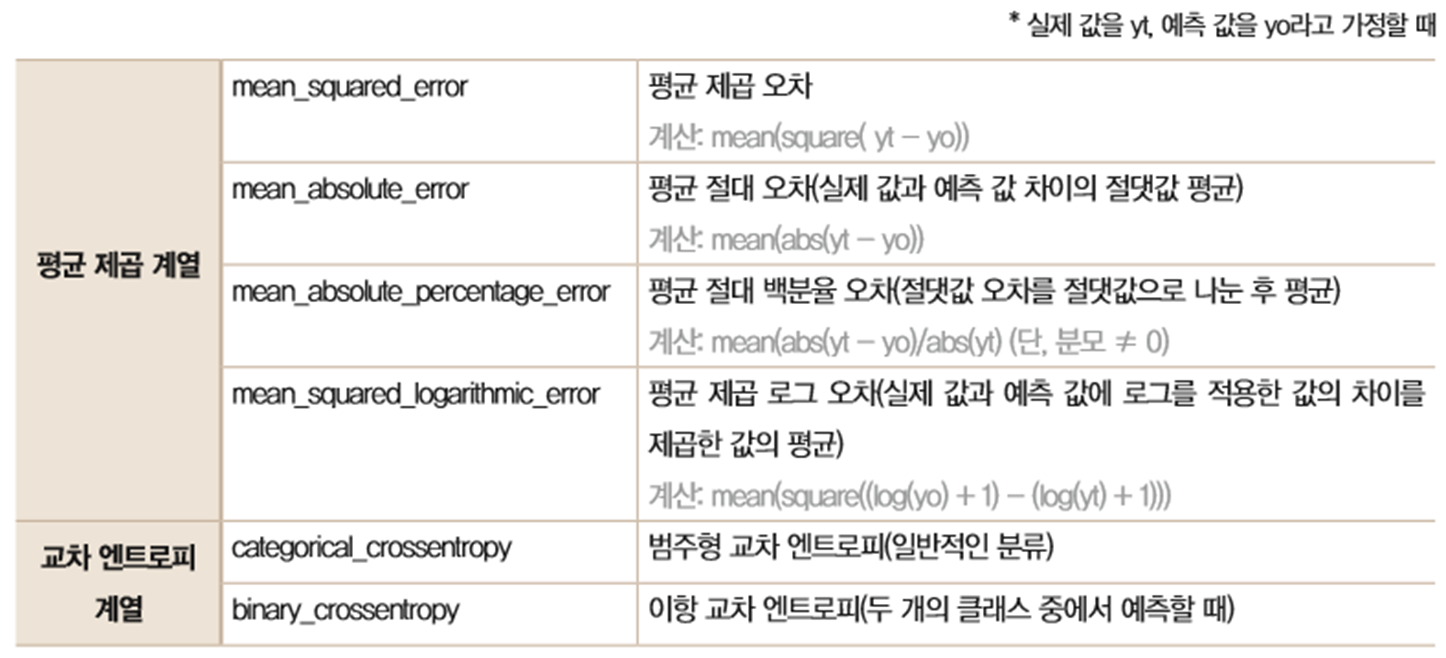

#### 활성화 함수(activation function)

- sigmoid : 이진분류의 출력층의 활성화 함수로 많이 사용
- softmax : 다중분류의 출력층의 활성화 함수로 사용
- relu, tanh, sigmoid : 은닉층의 활성화 함수로 사용
- 활성화 함수의 역할은 선형을 비선형으로 변환 -> 고차원 모델로

#### 최적화 함수(optimizer)

- compile(optimizer='rmsprop | adagrad | adam')
- sgd = keras.optimizer.SGD(learning_rate=0.1)
- sgd = keras.optimizer.SGD(learning_rate=0.1, momentum=0.9, nesterov=True)
- keras.optimizer.Adagrad()
- keras.optimizer.RMSprop()
- keras.optimizer.Adam()



#### Fashion MNist 데이터셋을 이용한 분류 요약
- 신경망 : 완전연결층으로 이루어진 망 model.Sequential()
- 컴파일 : 손실함수, 최적화함수 compile()
- 학습 : 배치 사이즈, 에포크 fit()
- 평가 : evaluate()
- 예측 : predict()

### 확인문제

1. 어떤 인공 신경망이 입력특성이 100개 이고 밀집층에 있는 뉴런 개수가 10개일 때 필요한 모델 파라미터 개수는 몇개인가요?
    - 인공 신경망에서 밀집층(Dense layer) 또는 완전 연결층(Fully connected layer)은 입력 특성과 밀집층의 뉴런 사이의 모든 연결을 포함합니다. 각 연결은 하나의 가중치를 가지며, 각 뉴런은 하나의 편향(bias)을 가집니다.

    - 1. 가중치 파라미터: 각 입력 특성(feature)은 각 뉴런과 연결되므로, 가중치 파라미터의 개수는 입력 특성의 개수 × 뉴런의 개수입니다.
    - 2. 편향 파라미터: 각 뉴런마다 하나의 편향 파라미터가 있습니다. 따라서 편향 파라미터의 개수는 뉴런의 개수와 같습니다.

    - 총 파라미터 개수 = (입력 특성의 개수 × 뉴런의 개수)+ 뉴런의 개수
        - 입력 특성의 개수: 100개/ 뉴런의 개수: 10개
        - 총 파라미터 개수 = (100×10)+10 = 1000+10 = 1010
        - 필요한 모델 파라미터의 개수는 1010개.

2. 케라스이 Dense 클래스를 사용해 신경망의 출력층을 만들려고 한다. 이 신경망이 이진 분류 모델이라면 activation 매개변수에 어떤 활성화 함수를 지정해야 하는가?

    - 이진 분류 모델 출력층 활성화 함수: 시그모이드 함수(sigmoid) 
    - 시그모이드 함수는 입력 값을 0과 1 사이의 확률 값으로 변환, 이진 분류 문제에서 각 클래스에 속할 확률을 예측하는데 적합.
    - Dense(1, activation='sigmoid')는 출력층에 1개의 뉴런을 가지고, 활성화 함수로 시그모이드 함수를 사용한다는 의미. 이 신경망은 출력값으로 0과 1 사이의 값을 반환, 이 값은 클래스 1에 속할 확률.

```python
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
# 예시로, 중간층 추가
model.add(Dense(10, input_dim=100, activation='relu'))
# 출력층
model.add(Dense(1, activation='sigmoid'))
```

3. 케라스 모델에서 손실 함수와 측정 지표 등을 지정하는 메서드는 무엇인가?
    - compile 메서드를 사용하여 모델 학습 전에 필요한 설정을 함. 이 설정에 손실 함수, 옵티마이저, 측정 지표 등이 포함됨.
    - optimizer: 학습 과정을 조정하는 알고리즘. Adam, SGD, RMSprop 등이 있음.
    - loss: 모델이 학습할 때 최소화하려고 하는 손실 함수. 이진 분류에서는 binary_crossentropy를 사용.
    - metrics: 모델의 성능을 평가할 때 사용할 측정 지표. 일반적으로 분류 문제에서는 정확도(accuracy) 사용.
    - 이 방법을 통해 모델의 학습 설정 완료 후 fit 메서드를 사용하여 모델을 학습.
    
```python
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

# 모델 생성
model = Sequential()
model.add(Dense(10, input_dim=100, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# 모델 컴파일
model.compile(optimizer=Adam(), #optimizer는 Adam 옵티마이저를 사용
              loss='binary_crossentropy', # loss는 이진 분류에 적합한 binary_crossentropy 사용
              metrics=['accuracy']) # metrics에는 모델 성능 평가 - 정확도(accuracy) 사용
```

4. 정수 레이블을 타깃으로 가지는 다중 분류 문제일 때, 케라스 모델의 compile() 메서드에 지정할 손실함수로 적절한 것은 무엇인가?
    - 정수 레이블을 타깃으로 가지는 다중 분류 문제에는 케라스 모델의 compile 메서드에 지정할 손실 함수로 sparse_categorical_crossentropy를 사용하는 것이 적절함. 이 손실 함수는 정수형 레이블을 직접 처리할 수 있으며, 원-핫 인코딩을 사용할 필요가 없음.

```python
# 모델 컴파일
model.compile(optimizer='adam', # optimizer는 Adam 옵티마이저를 사용
              loss='sparse_categorical_crossentropy', # loss는 다중 분류에 적합한 sparse_categorical_crossentropy 사용
              metrics=['accuracy']) # metrics에는 모델 성능평가 - 정확도(accuracy) 사용
```

5. 크기가 $300*300$인 입력을 케라스 층으로 펼치려고 한다. 어떤 층을 사용해야 하는가?
    - 크기가 300×300인 입력을 펼치기 위해서는 Keras의 Flatten 층 사용. 다차원 입력을 1차원으로 펼치는 역할.
    - 300×300 크기의 이미지를 Flatten 층을 통해 펼치면 300 × 300 = 90,000 차원의 1차원 벡터로 변환.
    - 코드: 300×300×3 크기의 컬러 이미지를 입력으로 받아 270,000 (300 * 300 * 3) 차원의 벡터로 펼침. 만약 입력이 흑백 이미지라면 채널 수는 1. 
        - Flatten 층: 다차원 배열을 1차원 벡터로 변환.
        - InputLayer: 모델의 입력 모양 정의. 
        
```python
from keras.models import Sequential
from keras.layers import Flatten

model = Sequential()

# 예를 들어, 입력 크기가 300x300인 입력을 펼치기 위해 InputLayer를 사용할 수 있습니다.
model.add(keras.Input(shape=(300, 300, 3)))  # 컬러 이미지라면 채널이 3 (RGB)이 됩니다.
model.add(Flatten())

# 모델 요약을 출력해서 확인
model.summary()
```

6. 이미지 분류를 위한 심층신경망에서 널리 사용되는 케라스의 활성화 함수는 무엇인가?  
    ① linear       
    ② sigmoid      
    ③ relu     
    ④ tanh
    
  => ③ ReLU (Rectified Linear Unit) 
ReLU 활성화 함수는 음수를 0으로, 양수를 그대로 반환하는 함수로, 신경망의 학습 속도와 성능을 크게 개선시킴. 이미지 분류를 포함한 다양한 딥러닝 모델에서 주로 사용. ReLU는 기울기 소실 문제(vanishing gradient problem)를 완화하는 데 효과적, 이는 신경망의 깊이가 깊어질수록 중요한 장점.

7. 다음 중 적응적 합습률을 사용하지 않는 옵티마이저는 무엇인가?  
    ① SGD        
    ② Adagrad       
    ③ RMSprop       
    ④ Adam
    
=> ① SGD (Stochastic Gradient Descent) 
적응적 학습률(Adaptive learning rate)을 사용하는 옵티마이저는 주어진 학습 데이터와 모델의 상태에 따라 학습률을 조절하여 학습을 최적화하는 방법. 여기에는 주로 Adagrad, RMSprop, Adam 옵티마이저가 포함. 따라서, 적응적 학습률을 사용하지 않는 옵티마이저는 ① SGD (Stochastic Gradient Descent). SGD는 각각의 매개변수마다 동일한 학습률을 사용하며, 적응적으로 학습률을 조정하지 않음.